In [73]:

import os
import sys
sys.path.append(os.path.abspath('..'))
import pandas as pd

data = pd.read_parquet("/data/csi_datasets/shs100k2_yt.parquet").set_index("yt_id")

left_attr = ["title", "performer"]
right_df = ["video_title", "channel_name", "description"]



# String Matching
### SHS100K 

In [74]:
from src.Matcher import SimpleMatcher

def string_match_lower(left_str: str, right_str: str):
    return float(left_str.lower() in right_str.lower())

simple_matcher = SimpleMatcher(func=string_match_lower)


left = ["title", "performer"]
right = ["video_title", "channel_name", "description"]

data_simple = simple_matcher.match_pairwise(data, left, right, level="attr")



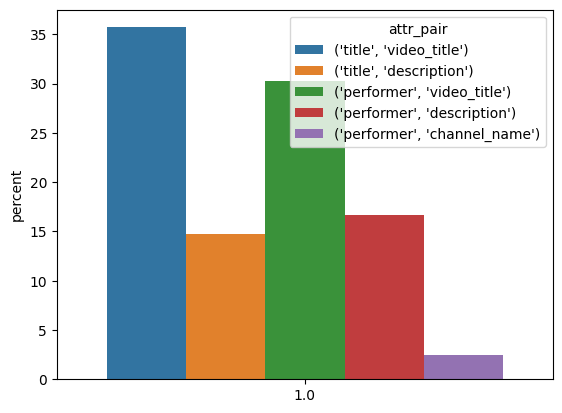

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    data=data_simple[[('title', 'video_title'),
                      ('title', 'description'),
                      ('performer', 'video_title'),
                      ('performer', 'description'),
                      ('performer', 'channel_name')]].reset_index().melt(
                          id_vars='yt_id', 
                          var_name='attr_pair', 
                          value_name='Count').query("Count == 1"),
    x='Count',
    hue='attr_pair',
    stat='percent'
)

plt.xlabel("")
plt.show()



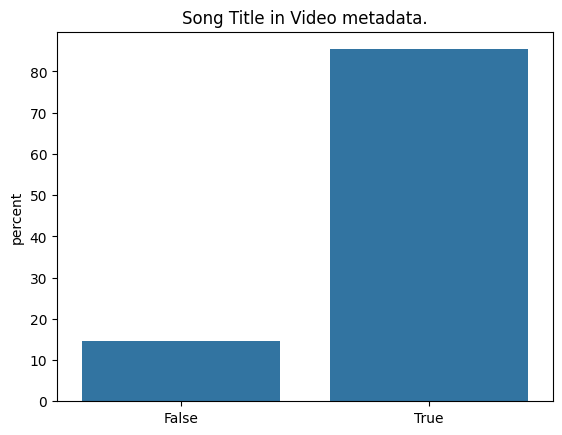

In [76]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('title', 'video_title')] > 0.5) | 
            (data_simple[('title', 'description')] > 0.5) | 
            (data_simple[('title', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Song Title in Video metadata.")
plt.xlabel("")
plt.show()



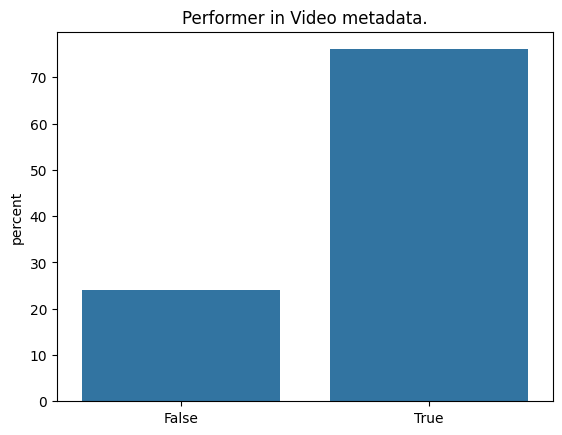

In [77]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('performer', 'video_title')] > 0.5) | 
            (data_simple[('performer', 'description')] > 0.5) | 
            (data_simple[('performer', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Performer in Video metadata.")
plt.xlabel("")
plt.show()



### Da-Tacos

In [78]:
data = pd.read_parquet("/data/csi_datasets/datacos_yt.parquet").set_index("yt_id")


left = ["perf_title", "work_title", "perf_artist", "work_artist"]
right = ["video_title", "channel_name", "description"]

data_simple = simple_matcher.match_pairwise(data, left, right, level="attr")


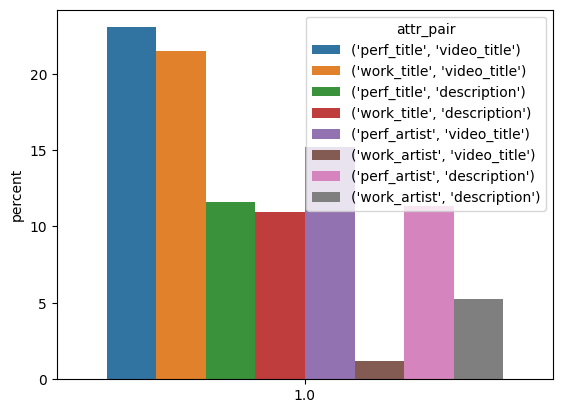

In [79]:
sns.countplot(
    data=data_simple[[('perf_title', 'video_title'),
                      ('work_title', 'video_title'),
                      ('perf_title', 'description'),
                      ('work_title', 'description'),
                      ('perf_artist', 'video_title'),
                      ('work_artist', 'video_title'),
                      ('perf_artist', 'description'),
                      ('work_artist', 'description')]].reset_index().melt(
                          id_vars='yt_id', 
                          var_name='attr_pair', 
                          value_name='Count').query("Count == 1"),
    x='Count',
    hue='attr_pair',
    stat='percent'
)

plt.xlabel("")
plt.show()



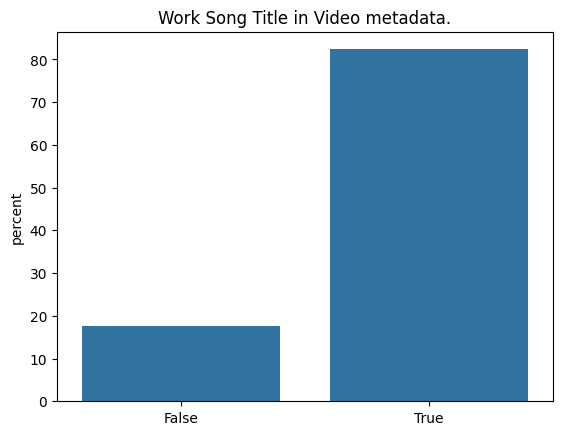

In [80]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('work_title', 'video_title')] > 0.5) | 
            (data_simple[('work_title', 'description')] > 0.5) | 
            (data_simple[('work_title', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Work Song Title in Video metadata.")
plt.xlabel("")
plt.show()



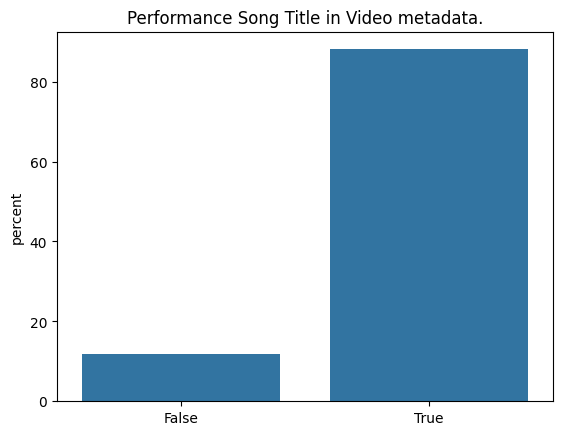

In [82]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('perf_title', 'video_title')] > 0.5) | 
            (data_simple[('perf_title', 'description')] > 0.5) | 
            (data_simple[('perf_title', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Performance Song Title in Video metadata.")
plt.xlabel("")
plt.show()



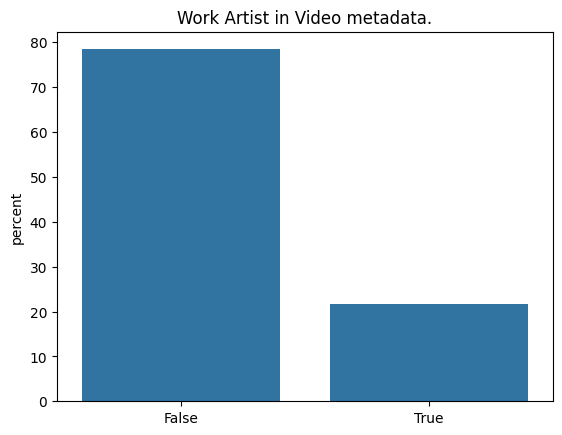

In [83]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('work_artist', 'video_title')] > 0.5) | 
            (data_simple[('work_artist', 'description')] > 0.5) | 
            (data_simple[('work_artist', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Work Artist in Video metadata.")
plt.xlabel("")
plt.show()



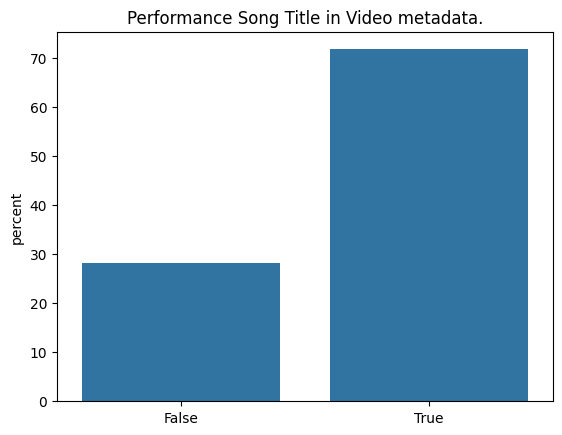

In [84]:
sns.countplot(
    data=data_simple.assign(
        # Song title is either in title or description
        title_in_title_or_description=(
            data_simple[('perf_artist', 'video_title')] > 0.5) | 
            (data_simple[('perf_artist', 'description')] > 0.5) | 
            (data_simple[('perf_artist', 'channel_name')] > 0.5)
            ),
    x='title_in_title_or_description',
    stat='percent'
)

plt.title("Performance Song Title in Video metadata.")
plt.xlabel("")
plt.show()



# Fuzzy Matching

In [12]:
from src.Matcher import FuzzyMatcher

fuzzy_matcher = FuzzyMatcher("fuzz.token_ratio")

left = ["title", "performer"]
right = ["video_title", "description"]

data_fuzzy = fuzzy_matcher.match_pairwise(data, left, right, level="attr")





,set_id,ver_id,title,performer,has_file,has_cqt_ch,has_cqt_20,has_crema,split,video_title,...,is_family_safe,category,is_live_now,keywords_tokenized,"(title, video_title)","(title, channel_name)","(title, description)","(performer, video_title)","(performer, channel_name)","(performer, description)"
yt_id,,,,,,,,,,,,,,,,,,,,,
_FwOHyGkcy4,175,2,I Didn't Know What Time It Was,Peggy Lee,True,None,None,None,TRAIN,I Didn't Know What Time it Was - Peggy Lee,...,True,Music,False,"[know, rowl, jimmi, shaughnessi, peggi, candol...",94.736839,0.0,11.475410,100.000000,0.0,100.000000
MVJRSXFe-E8,1268,22,Be My Love,Steve Kuhn Trio,True,None,None,None,TRAIN,Steve Kuhn - Be My Love,...,True,Music,False,"[piano, mogu, jazz, easi, kuhn, trio, steve, s...",100.000000,0.0,100.000000,80.000000,0.0,80.000000
wLU0uqsyIs4,238,17,La vie en rose,Iggy Pop,True,None,None,None,TRAIN,Iggy Pop - Après - La Vie En Rose (Edith Piaf),...,True,Music,False,"[pop, music, piaf, album, vie, jone, la, lui, ...",40.677967,0.0,0.000000,100.000000,0.0,0.000000
EN8tC2XlCSk,2386,14,Iko Iko,Zap Mama,True,None,None,None,TRAIN,Zap Mama Iko-Iko,...,True,Music,False,"[musica, internazional]",52.173912,0.0,24.000000,100.000000,0.0,23.076923
IeBIfRWtzCc,1227,32,Pledging My Love,The Holmes Brothers,False,None,None,None,TRAIN,Pledging My Love,...,True,Music,False,"[holm, pledg, feed, soul, brother, love]",100.000000,0.0,100.000000,28.571428,1.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OUtubav27dQ,2082,8,Soul Man,Philly Cream,True,None,None,None,TRAIN,Philly Cream - Soul Man,...,True,People & Blogs,False,[],100.000000,0.0,15.000000,100.000000,0.0,18.181818
kfWUuly_Eu4,2673,7,See That My Grave Is Kept Clean,Arranged & Conducted by Fred Karlin,False,None,None,None,TRAIN,Fred Karlin- See That My Grave is Kept Clean (...,...,True,Music,False,"[leadbelli, fred, jefferson, karlin, 1976, lem...",94.915253,0.0,59.090908,41.237114,0.0,33.333332
H4BVwWutUvY,6475,2,Lucifer Sam,The Three O'Clock,True,False,True,False,VAL,The Three O'Clock - Lucifer Sam (Pink Floyd Co...,...,True,Music,False,"[heaven, postpunk, garag, psychedel, lyric, gd...",100.000000,0.0,100.000000,100.000000,0.0,30.000000
